<a href="https://colab.research.google.com/github/csetapan/File_Handling_In_Google_Colab/blob/main/Agriculture_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Steps by step process

1   Data Pre-processing
2   Exploratory Data Analysis
3   Exploratory Data Analysis (EDA)
4   Statistical Analysis
6   Machine Learning Pipeline

**Data Pre-processing**

In [ ]:
#Read Data Set
import pandas as pd

df = pd.read_csv("/content/agricultural_with_seasons.csv")

In [ ]:
#Check Data Set
df.info()
df.describe()
df.head()

In [ ]:
#Handle Missing Values
df.isnull().sum()  # Identify missing values

In [ ]:
#Missing Values Per column
missing = df.isnull().sum()
missing = missing[missing > 0]
print(missing)

In [ ]:
#Percentage of missing Values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent[missing_percent > 0]
print(missing_percent)

In [ ]:
#Find Column with null values
df.columns[df.isnull().any()]

In [ ]:
#Noisey values
def find_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column] > upper)]
    return len(outliers)

outlier_summary = {col: find_outliers(col) for col in df.select_dtypes(include='number').columns}
print({k: v for k, v in outlier_summary.items() if v > 0})

In [ ]:
#Encode Categorical Values
df = pd.get_dummies(df, drop_first=True)  # For ML

**Data Analytics Questions**

Which crops have the highest average yield per hectare?

Which crops are grown in the most regions or seasons?



**Crops with the Highest Average Yield per Hectare**

/tmp/ipython-input-13-2438048898.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_yield.values[:10], y=avg_yield.index[:10], palette="viridis")


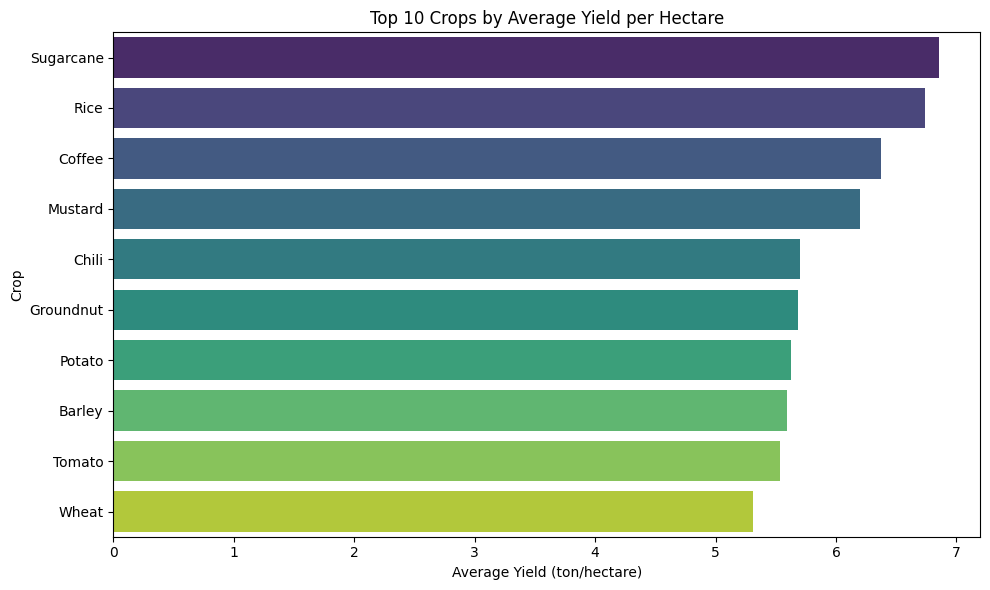

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("agricultural_with_seasons.csv")
df.columns = df.columns.str.strip().str.replace(" ", "_")

avg_yield = df.groupby('Product')['Avg_Yield_ton_per_hectare'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_yield.values[:10], y=avg_yield.index[:10], palette="viridis")
plt.title("Top 10 Crops by Average Yield per Hectare")
plt.xlabel("Average Yield (ton/hectare)")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()


**Crops Grown in the Most Regions or Seasons**

In [ ]:
# Crops in most regions
region_counts = df.groupby('Product')['Region'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=region_counts.values[:10], y=region_counts.index[:10], palette="Set2")
plt.title("Top 10 Crops by Number of Regions")
plt.xlabel("Number of Regions")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()

# Crops in most seasons
season_counts = df.groupby('Product')['Season'].nunique().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.values[:10], y=season_counts.index[:10], palette="Set3")
plt.title("Top 10 Crops by Number of Seasons")
plt.xlabel("Number of Seasons")
plt.ylabel("Crop")
plt.tight_layout()
plt.show()


**Exploratory Data Analysis**

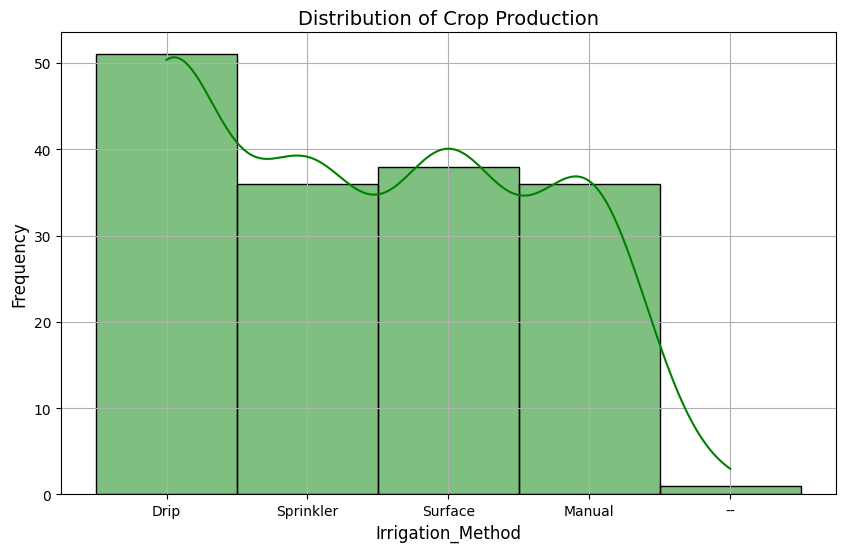

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# If using Jupyter or Colab
%matplotlib inline

# Check if 'Crop_Production' exists

plt.figure(figsize=(10, 6))
sns.histplot(df['Irrigation_Method'].dropna(), kde=True, bins=30, color='green')
plt.title('Distribution of Crop Production', fontsize=14)
plt.xlabel('Irrigation_Method', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

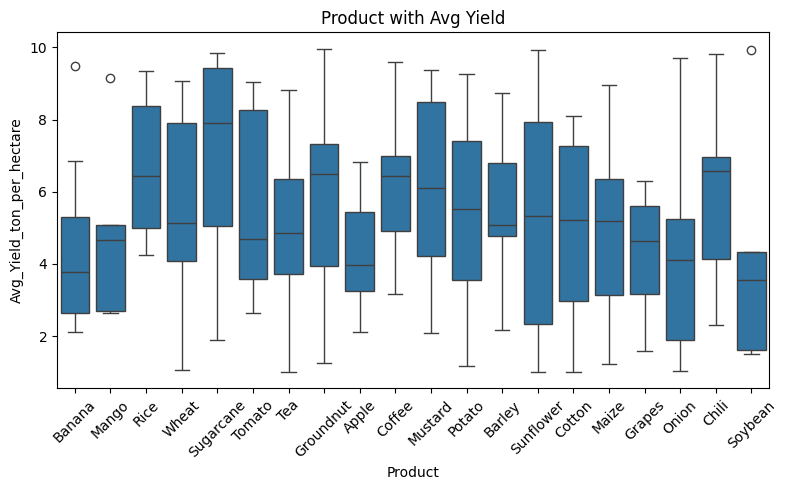

In [ ]:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Product', y='Avg_Yield_ton_per_hectare', data=df)
    plt.title('Product with Avg Yield')
    plt.xlabel('Product')
    plt.ylabel('Avg_Yield_ton_per_hectare')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Avg_Yield_ton_per_hectare', data=df, estimator='mean', ci=None)
plt.title('Average Yield per Product')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numerical Features)')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x='Avg_Rainfall_mm',
    y='Avg_Yield_ton_per_hectare',
    hue='Season',  # optional: adds color by Season
    style='Region'  # optional: adds different markers by Region
)
plt.title('Avg Rainfall vs Avg Yield')
plt.xlabel('Avg Rainfall (mm)')
plt.ylabel('Avg Yield (ton/hectare)')
plt.grid(True)
plt.tight_layout()
plt.show()

**Problem Statement**
"Predict the average yield (ton/hectare) of a crop based on soil, season, climate, and farming input features."

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load data
df = pd.read_csv("agricultural_with_seasons.csv")

# Create binary classification target (High_Yield)
threshold = df['Avg_Yield_ton_per_hectare'].median()
df['High_Yield'] = (df['Avg_Yield_ton_per_hectare'] >= threshold).astype(int)

# Drop original yield column
X = df.drop(columns=['Avg_Yield_ton_per_hectare', 'High_Yield'])
y = df['High_Yield']

# Fill missing values (basic strategy)
X = X.fillna(method='ffill')

# One-hot encode categorical manually (basic version)
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))



/tmp/ipython-input-18-1204349072.py:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')


Accuracy: 0.45

Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.29      0.39        24
           1       0.39      0.69      0.50        16

    accuracy                           0.45        40
   macro avg       0.49      0.49      0.44        40
weighted avg       0.51      0.45      0.43        40


Confusion Matrix:
 [[ 7 17]
 [ 5 11]]


**Will a crop have high yield or low yield?**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv("agricultural_with_seasons.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(" ", "_")

# Create binary classification target
threshold = df['Avg_Yield_ton_per_hectare'].median()
df['High_Yield'] = (df['Avg_Yield_ton_per_hectare'] >= threshold).astype(int)

# Features and target
X = df.drop(columns=['Avg_Yield_ton_per_hectare', 'High_Yield'])
y = df['High_Yield']

# Fill missing values
X = X.fillna(method='ffill')

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Low Yield", "High Yield"]))

# TEST: Show actual vs predicted values for sample rows
test_results = X_test.copy()
test_results['Actual_High_Yield'] = y_test.values
test_results['Predicted_High_Yield'] = y_pred

print("\n Sample Test Results (first 10 rows):")
print(test_results[['Actual_High_Yield', 'Predicted_High_Yield']].head(10))


/tmp/ipython-input-60-1562705508.py:21: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X = X.fillna(method='ffill')



 Accuracy: 0.60

 Confusion Matrix:
[[12 12]
 [ 4 12]]

 Classification Report:
              precision    recall  f1-score   support

   Low Yield       0.75      0.50      0.60        24
  High Yield       0.50      0.75      0.60        16

    accuracy                           0.60        40
   macro avg       0.62      0.62      0.60        40
weighted avg       0.65      0.60      0.60        40


 Sample Test Results (first 10 rows):
     Actual_High_Yield  Predicted_High_Yield
95                   1                     1
15                   1                     1
30                   0                     1
158                  1                     1
128                  1                     1
115                  0                     1
69                   1                     1
170                  0                     0
174                  0                     0
45                   0                     0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
df


**PROJECT**
With the provides CAR Data Set solve following proble statements

Which car brands are sold most frequently?

How does the price vary with the number of kilometers driven?

**Classification**
"Predict whether a used car will be sold based on its features such as brand, model, year, fuel type, price, kilometers driven, and seller type."